**4. Visualising passing locations for Left Centre Backs for different categories based on defence lineup and preferred foot of the defenders**

On reviewing the data, we found that the choice of preferred foot for a left center back varies considerably. We intend to find how different footed left center backs contribute to the build-up based on their passing preference.

We analysed this pattern for four defender lineups and three/five defender lineups seperately.

The following tasks are taken into account in this notebook: (These tasks were completed for both four defender and three/five defender formations)

1. Plotted heatmaps for initial and final pass locations for left center backs (four defender and three/five defender formation) for all accurate/inaccurate passes, aerial passes and long passes (i.e passes that travel atleast 30m).

2. Divided the pitch into 8 regions:

     a. Right Flank Attack - x >= 52 and y <= 17
     
     b. Right Flank Defence - x < 52 and y <= 17
     
     c. Right Central Attack - x >= 52 and y > 17 and y <= 34
     
     d. Right Central Defence - x < 52 and y > 17 and y <= 34
     
     e. Left Central Attack - x >= 52 and y > 34 and y <= 51 
     
     f. Left Central Defence - x < 52 and y > 34 and y <= 51
     
     g. Left Flank Attack - x >= 52 and y > 51 and y <= 68
     
     h. Left Flank Defence - x < 52 and y > 51 and y <= 68
     
     
    and calculated the percentage of accurate long balls (i.e. number of accurate long balls in region/total number of acurate long balls) made in these regions.
     
3. Used hypothesis testing to validate if the results found were statistically significant

4. Performed random sampling test


# Imports 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import math
import matplotlib.pylab as pyl
import pickle
import swifter
import warnings
import plotly.express as px
from itertools import chain
import scipy.stats as sps
import itertools
import os
from tqdm import tqdm
warnings.filterwarnings('ignore')

C:\Users\Anuj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 1000)
pd.set_option("display.max_rows", 3000)
warnings.filterwarnings('ignore')

# Data 

**We create four dataframes** -

    1. Four at the back formations with left center back being left footed
    
    2. Four at the back formations with left center back being right footed
    
    3. Three/Five at the back formations with left center back being left footed
    
    4. Three/Five at the back formations with left center back being right footed

In [3]:
cluster_four_defs = pd.read_pickle('../data_top5/clusters/clusters_v3/cluster_four_defs.pkl')
cluster_four_defs.reset_index(drop=True, inplace=True)
cluster_four_defs.team.unique()

array(['Leicester City', 'Brighton', 'Burnley', 'Huddersfield',
       'Manchester Utd', 'West Ham', 'Newcastle Utd', 'Tottenham',
       'Southampton', 'Swansea City', 'Liverpool', 'Watford',
       'Bournemouth', 'West Brom', 'Manchester City', 'Crystal Palace',
       'Everton', 'Stoke City', 'Arsenal', 'Angers', 'Bordeaux', 'Nantes',
       'Lyon', 'Strasbourg', 'Dijon', 'Marseille', 'Guingamp', 'Metz',
       'Monaco', 'Toulouse', 'Caen', 'Montpellier', 'Paris S-G', 'Nice',
       'Saint-Étienne', 'Rennes', 'Troyes', 'Amiens', 'Lille',
       'Bayern Munich', 'Leverkusen', 'Hertha BSC', 'Stuttgart', 'Köln',
       "M'Gladbach", 'RB Leipzig', 'Augsburg', 'Hamburger SV',
       'Hannover 96', 'Mainz 05', 'Dortmund', 'Wolfsburg', 'Hoffenheim',
       'Freiburg', 'Eint Frankfurt', 'Werder Bremen', 'Schalke 04',
       'Levante', 'Villarreal', 'Celta Vigo', 'Real Sociedad',
       'Athletic Club', 'Getafe', 'Atlético Madrid', 'Espanyol',
       'Sevilla', 'Eibar', 'Barcelona', 'Betis',

In [4]:
cluster_three_five_defs = pd.read_pickle('../data_top5/clusters/clusters_v3/cluster_three_five_defs.pkl')
cluster_three_five_defs.reset_index(drop=True, inplace=True)
cluster_three_five_defs.team.unique()

array(['Arsenal', 'Manchester City', 'Chelsea', 'Crystal Palace',
       'Everton', 'Stoke City', 'Swansea City', 'West Ham', 'Bournemouth',
       'Tottenham', 'West Brom', 'Watford', 'Manchester Utd',
       'Huddersfield', 'Liverpool', 'Newcastle Utd', 'Southampton',
       'Brighton', 'Leicester City', 'Saint-Étienne', 'Montpellier',
       'Lille', 'Angers', 'Guingamp', 'Nantes', 'Caen', 'Metz', 'Rennes',
       'Dijon', 'Paris S-G', 'Strasbourg', 'Hoffenheim', 'Werder Bremen',
       'Eint Frankfurt', 'Freiburg', 'Schalke 04', 'Leverkusen',
       'Stuttgart', 'Mainz 05', 'Wolfsburg', 'Köln', 'Augsburg',
       'Hamburger SV', 'Hannover 96', 'Dortmund', "M'Gladbach",
       'RB Leipzig', 'Girona', 'Málaga', 'Eibar', 'Alavés', 'Las Palmas',
       'Betis', 'Atlético Madrid', 'Real Sociedad', 'Leganés',
       'Celta Vigo', 'Athletic Club', 'Atalanta', 'Lazio', 'SPAL',
       'Genoa', 'Sassuolo', 'Milan', 'Crotone', 'Bologna', 'Cagliari',
       'Benevento', 'Udinese', 'Juventus', 

In [5]:
def three_five_lcb_foot(row,foot):
    if row['backline']==3:
        return row['footedness'].split('-')[-1]==foot
    else:
        return row['footedness'].split('-')[-2]==foot

In [6]:
four_defs_lcb_lf_clusters = cluster_four_defs[cluster_four_defs['footedness'].apply(lambda x: x.split('-')[-2]=='left')]
four_defs_lcb_rf_clusters = cluster_four_defs[cluster_four_defs['footedness'].apply(lambda x: x.split('-')[-2]=='right')]
three_five_defs_lcb_lf_clusters = cluster_three_five_defs[cluster_three_five_defs[['backline','footedness']].apply(lambda x : three_five_lcb_foot(x,'left'),axis=1)]
three_five_defs_lcb_rf_clusters = cluster_three_five_defs[cluster_three_five_defs[['backline','footedness']].apply(lambda x : three_five_lcb_foot(x,'right'),axis=1)]

In [8]:
three_five_defs_lcb_rf_clusters.tail(10)

wyId           team  \
862  2501000    Montpellier   
863  2501046           Metz   
864  2501051  Saint-Étienne   
866  2516752      Wolfsburg   
869  2565633          Eibar   
871  2565646          Eibar   
875  2565770          Betis   
876  2565780          Betis   
877  2565864          Betis   
878  2565877     Las Palmas   

                                          team_defense   RB R_CB L_CB   LB  \
862  [RubenAguilar, NordiMukieleMulere, VitorinoHil...  NaN  NaN  NaN  NaN   
863  [OpaNguette, VahidSelimovic, FallouDiagne, Geo...  NaN  NaN  NaN  NaN   
864  [MathieuDebuchy, LoicPerrin, NevenSubotic, Kev...  NaN  NaN  NaN  NaN   
866  [PaulVerhaegh, MarcelTisserand, IgnacioCamacho...  NaN  NaN  NaN  NaN   
869  [AnderCapaRodriguez, PauloAndreRodriguesdeOliv...  NaN  NaN  NaN  NaN   
871  [AnderCapaRodriguez, PauloAndreRodriguesdeOliv...  NaN  NaN  NaN  NaN   
875  [FranciscoJavierGuerreroMartin, AissaMandi, Ma...  NaN  NaN  NaN  NaN   
876  [AntonioBarraganFernandez, AissaMandi, MarcBar...  NaN  NaN  NaN  NaN   
877  [AntonioBarraganFernandez, AissaMandi, Francis...  NaN  NaN  NaN  NaN   
878  [MichelMacedoRochaMachado, DavidGarciaSantana,...  NaN  NaN  NaN  NaN   

                               RCB                              CB  \
862             NordiMukieleMulere           VitorinoHiltondaSilva   
863                 VahidSelimovic                    FallouDiagne   
864                     LoicPerrin                    NevenSubotic   
866                MarcelTisserand           IgnacioCamachoBarnola   
869  PauloAndreRodriguesdeOliveira            DavidRodriguezLomban   
871  PauloAndreRodriguesdeOliveira            DavidRodriguezLomban   
875                     AissaMandi               MarcBartraAregall   
876                     AissaMandi               MarcBartraAregall   
877                     AissaMandi  FranciscoJavierGarciaFernandez   
878             DavidGarciaSantana           AlejandroGalvezJimena   

                         LCB                            RWB  \
862             DanielCongre                   RubenAguilar   
863  GeorgesConstantMandjeck                     OpaNguette   
864  KevinTheophileCatherine                 MathieuDebuchy   
866              RobinKnoche                   PaulVerhaegh   
869      AnaitzArbillaZabala             AnderCapaRodriguez   
871      AnaitzArbillaZabala             AnderCapaRodriguez   
875            JordiAmatMaas  FranciscoJavierGuerreroMartin   
876            JordiAmatMaas       AntonioBarraganFernandez   
877        MarcBartraAregall       AntonioBarraganFernandez   
878    JoaquinNavarroJimenez       MichelMacedoRochaMachado   

                             LWB  backline                     match gameweek  \
862             JeromeRoussillon       5.0     Marseille-Montpellier       32   
863                 NicolasBasin       5.0               Amiens-Metz       37   
864  GabrielMoisesAntunesdaSilva       5.0      Monaco-Saint-Étienne       37   
866              YannickGerhardt       5.0  Eint Frankfurt-Wolfsburg        2   
869          JoseAngelValdesDiaz       5.0         Real Madrid-Eibar        9   
871          JoseAngelValdesDiaz       5.0             Eibar-Levante       10   
875      HectorJuniorFirpoAdames       5.0           La Coruña-Betis       23   
876      HectorJuniorFirpoAdames       5.0         Betis-Real Madrid       24   
877      HectorJuniorFirpoAdames       5.0              Girona-Betis       32   
878       DaniCastellanoBetancor       5.0          Betis-Las Palmas       33   

                                             teamsData              dateutc  \
862  {'3771': {'scoreET': 0, 'coachId': 25691, 'sid...  2018-04-08 19:00:00   
863  {'3789': {'scoreET': 0, 'coachId': 26812, 'sid...  2018-05-12 19:00:00   
864  {'3782': {'scoreET': 0, 'coachId': 0, 'side': ...  2018-05-12 18:00:00   
866  {'2451': {'scoreET': 0, 'coachId': 145007, 'si...  2017-08-26 13:30:00   
869  {'675': {'scoreET': 0, 'coachId': 275283, 'sid... 

In [9]:
four_defs_lcb_lf_clusters.reset_index(inplace=True)
four_defs_lcb_rf_clusters.reset_index(inplace=True)
three_five_defs_lcb_lf_clusters.reset_index(inplace=True)
three_five_defs_lcb_rf_clusters.reset_index(inplace=True)

# Functions 

## Plot a Football Pitch

{x:[0,104]; y:[0,68]}

In [6]:
def draw_pitch(line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)
        
        ####
        b = [17,17]
        a = [0,104]
        plt.plot(a,b,color=line,zorder=5)
        
        c = [34,34]
        d = [0,104]
        plt.plot(d,c,color=line,zorder=5)

        e = [51,51]
        f = [0,104]
        plt.plot(f,e,color=line,zorder=5)
        
        ####
        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
        circle4 = plt.Circle((93, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)
        circle5 = plt.Circle((11, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)
        circle6 = plt.Circle((52, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-', color="None", zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-', color='None', zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color="None", zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        ax.add_artist(circle4)
        ax.add_artist(circle5)
        ax.add_artist(circle6)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
        
    return fig, ax

(<Figure size 748.8x489.6 with 1 Axes>, <AxesSubplot:>)

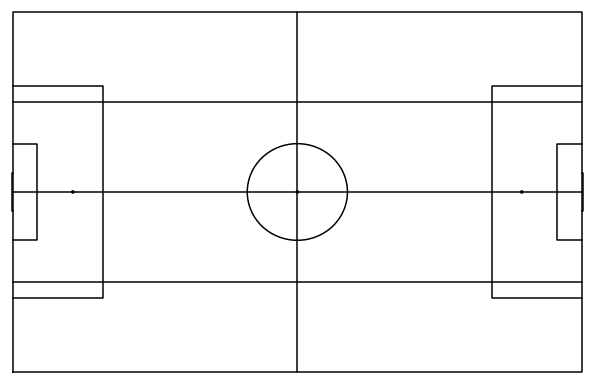

In [7]:
draw_pitch("#000000","h","full")

## Plot Event Data points on the Pitch 

In [12]:
def plot_points(x,y,c):
    draw_pitch("#faf0e6","h","full")
    plt.scatter(x,y,marker='o',color=c,edgecolors="black", zorder=12)
    plt.show()

## Get (x,y) coordinates from DataFrame 

In [13]:
def get_xy(df, col, n, m): #n - no of row entries
    # m = 0: Initial Position
    # m = 1: Final Position
    x=list()
    y=list()
    for i in range(0,n):
        for j in range(0, len(df[col][i])):
            for k in range(0,2):
                x.append(df[col][i][j][k][0])
                y.append(df[col][i][j][k][1])
    x = [x[i] for i in range(0+m, len(x), 2)]
    y = [y[i] for i in range(0+m, len(y), 2)]
    return x, y

## Plot Event Data Heatmap on Pitch 

In [14]:
def heatmap(x, y, title, c):
    fig, ax = draw_pitch("#000000","h","full")
    sns.kdeplot(x, y, cmap = c, shade = True)
    plt.title(title, fontsize = 30)
    plt.xlim(-1,105)
    plt.ylim(-1,69)
    plt.axis('off')
    plt.show()

## Compute and Generate KDE of Pass Distances 

In [15]:
def compute_dist_pdf(df, col):
    dist=list()
    for j in range(0, len(df)):
        d = [np.subtract(i[1], i[0]) for i in df[col][j]]
        d = [list(np.square(i)) for i in d]
        d = [(i[0]+i[1])**(0.5) for i in d]
        dist.append(d)
    sns.set(color_codes=True)
    sns.kdeplot(list(itertools.chain(*dist)), shade=True)
    return dist

## Filter Long Passes 

Long Pass - Pass distance >= 35 meters

In [16]:
def dist_threshold(df, col, n, m):
    x=list()
    y=list()
    x1=list()
    y1=list()
    for i in range(0,n):
        for j in range(0, len(df[col][i])):
            for k in range(0,2):
                x.append(df[col][i][j][k][0])
                y.append(df[col][i][j][k][1])
                
    for i in range(0, len(x), 2):
        dist = ((x[i] - x[i+1])**2 + (y[i] - y[i+1])**2)**(0.5)
        if (dist >= 35):
            x1.append(x[i])
            x1.append(x[i+1])
            y1.append(y[i])
            y1.append(y[i+1])
        else:
            continue
    
    x1 = [x1[i] for i in range(0+m, len(x1), 2)]
    y1 = [y1[i] for i in range(0+m, len(y1), 2)]
    
    return x1,y1

## Get total passes in each region of the pitch 

In [17]:
def get_region(x, y):

    x_rightflank_attack = [
        x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)
    ]
    y_rightflank_attack = [
        y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)
    ]
    x_rightflank_def = [
        x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)
    ]
    y_rightflank_def = [
        y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)
    ]

    x_leftflank_attack = [
        x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)
    ]
    y_leftflank_attack = [
        y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)
    ]
    x_leftflank_def = [
        x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)
    ]
    y_leftflank_def = [
        y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)
    ]

    x_rightcentral_attack = [
        x[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    y_rightcentral_attack = [
        y[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    x_rightcentral_def = [
        x[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    y_rightcentral_def = [
        y[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)
    ]

    x_leftcentral_attack = [
        x[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    y_leftcentral_attack = [
        y[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    x_leftcentral_def = [
        x[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    y_leftcentral_def = [
        y[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)
    ]

    return [len(x_rightflank_attack), len(x_rightflank_def), len(
        x_leftflank_attack), len(x_leftflank_def), len(
            x_rightcentral_attack), len(x_rightcentral_def), len(
                x_leftcentral_attack), len(x_leftcentral_def)]

In [18]:
def est_dense_reg(a, b, p):
    df_kde = pd.DataFrame(columns=['x', 'y'])
    df_kde['x'] = a
    df_kde['y'] = b
    kde = sps.gaussian_kde(df_kde.values.T)
    xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    zi = z > np.max(z) * (p/10)
    x1 = [min(xx[zi]), max(xx[zi])]
    y1 = [min(yy[zi]), max(yy[zi])]
    return x1, y1

# Analysis & Viz 

**Convention:** Initial Locations denoted by (a,b) &
Final Locations denoted by (x,y)

##  Four Defender Formation  - Right Footed LCB

### Accurate Passes

In [19]:
a,b = get_xy(four_defs_lcb_rf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_rf_clusters), 0) #Pass Initial Location

In [20]:
x,y = get_xy(four_defs_lcb_rf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_rf_clusters), 1) #Pass Final Location

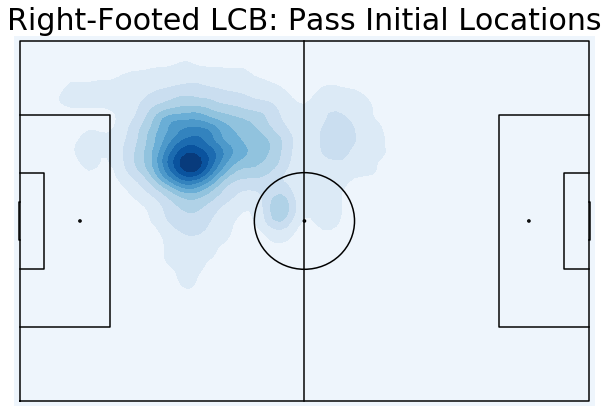

In [21]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Locations', 'Blues')

In [22]:
a,b = get_xy(four_defs_lcb_rf_clusters, 'L_CB_acchighpassloc', len(four_defs_lcb_rf_clusters), 0) #Aerial Pass Initial Location

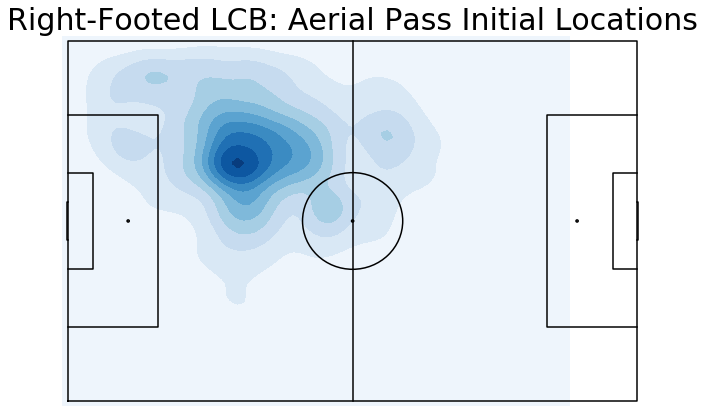

In [23]:
heatmap(a, b, 'Right-Footed LCB: Aerial Pass Initial Locations', 'Blues')

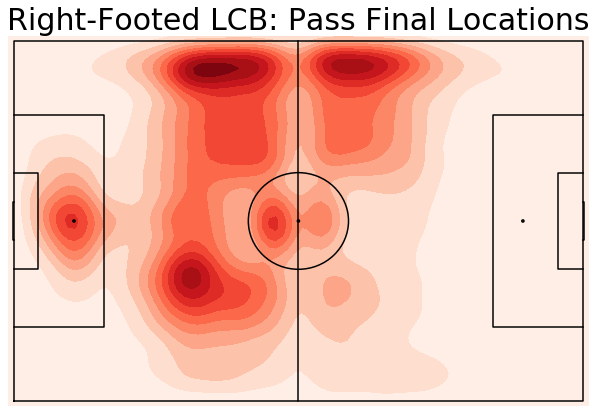

In [24]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Locations', 'Reds')

In [25]:
x,y = get_xy(four_defs_lcb_rf_clusters, 'L_CB_acchighpassloc', len(four_defs_lcb_rf_clusters), 1)

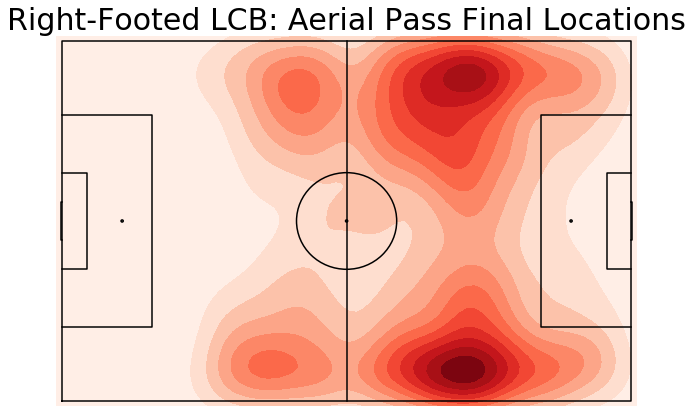

In [26]:
heatmap(x, y, 'Right-Footed LCB: Aerial Pass Final Locations', 'Reds')

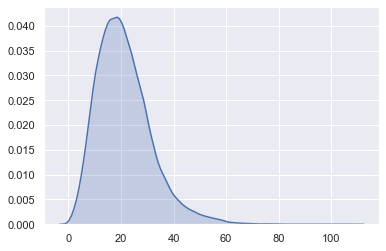

In [27]:
dist = compute_dist_pdf(four_defs_lcb_rf_clusters, 'L_CB_accpassloc')

In [28]:
four_defs_lcb_rf_clusters.head()

index     wyId            team  \
0      0  2499719  Leicester City   
1      1  2499720        Brighton   
2      3  2499722    Huddersfield   
3      4  2499724  Manchester Utd   
4      8  2499726     Southampton   

                                        team_defense  \
0  [DannySimpson, WesMorgan, HarryMaguire, Christ...   
1  [BrunoSaltorGrau, LewisDunk, ShaneDuffy, Marku...   
2  [TomSmith, MathiasJattahNjieJorgensen, Christo...   
3  [LuisAntonioValenciaMosquera, EricBertrandBail...   
4  [CedricRicardoAlvesSoares, JackStephens, MayaY...   

                            RB                        R_CB  \
0                 DannySimpson                   WesMorgan   
1              BrunoSaltorGrau                   LewisDunk   
2                     TomSmith  MathiasJattahNjieJorgensen   
3  LuisAntonioValenciaMosquera          EricBertrandBailly   
4     CedricRicardoAlvesSoares                JackStephens   

                   L_CB              LB  RCB   CB  LCB  RWB  LWB  backline  \
0          HarryMaguire  ChristianFuchs  NaN  NaN  NaN  NaN  NaN       4.0   
1            ShaneDuffy   MarkusSuttner  NaN  NaN  NaN  NaN  NaN       4.0   
2  ChristopherSchindler       ChrisLowe  NaN  NaN  NaN  NaN  NaN       4.0   
3             PhilJones      DaleyBlind  NaN  NaN  NaN  NaN  NaN       4.0   
4           MayaYoshida    RyanBertrand  NaN  NaN  NaN  NaN  NaN       4.0   

                         match gameweek  \
0       Arsenal-Leicester City        1   
1     Brighton-Manchester City        1   
2  Crystal Palace-Huddersfield        1   
3      Manchester Utd-West Ham        1   
4     Southampton-Swansea City        1   

                                           teamsData              dateutc  \
0  {'1609': {'scoreET': 0, 'coachId': 7845, 'side...  2017-08-11 18:45:00   
1  {'1651': {'scoreET': 0, 'coachId': 8093, 'side...  2017-08-12 16:30:00   
2  {'1628': {'scoreET': 0, 'coachId': 268775, 'si...  2017-08-12 14:00:00   
3  {'1633': {'scoreET': 0, 'coachId': 269869, 'si...  2017-08-13 15:00:00   
4  {'10531': {'scoreET': 0, 'coachId': 381291, 's...  2017-08-12 14:00:00   

                                    venue  \
0                        Emirates Stadium   
1  The American Express Community Stadium   
2                           Selhurst Park   
3                            Old Trafford   
4                      St. Mary's Stadium   

                                            referees score  \
0  [{'refereeId': 385909, 'role': 'referee'}, {'r...   4–3   
1  [{'refereeId': 384965, 'role': 'referee'}, {'r...   0–2   
2  [{'refereeId': 381851, 'role': 'referee'}, {'r...   0–3   
3  [{'refereeId': 384888, 'role': 'referee'}, {'r...   4–0   
4  [{'refereeId': 385916, 'role': 'referee'}, {'r...   0–0   

               footedness  RB_pass  RB_accpass  RB_highpass  RB_acchighpass  \
0  right-right-right-left       26          16            4               2   
1  right-right-right-left       25          17            3               1   
2  right-right-right-left       15           4            2               1   
3  right-right-right-left       43          41            3               3   
4  right-right-right-left       52          38            6               3   

                                       RB_accpassloc  \
0  [[[30.16, 42.84], [27.04, 65.96]], [[63.44, 24...   
1  [[[65.52, 5.44], [65.52, 17.0]], [[88.4, 4.76]...   
2  [[[72.8, 1.36], [75.92, 14.96]], [[20.8, 21.08...   
3  [[[14.56, 31.28], [34.32, 12.24]], [[45.76, 12...   
4  [[[55.12, 0.68], [76.96, 5.44]], [[52.0, 1.36]...   

                                     RB_inaccpassloc  \
0  [[[93.6, 2.04], [92.56, 6.8]], [[27.04, 2.72],...   
1  [[[34.32, 13.6], [55.12, 34.68]], [[34.32, 21....   
2  [[[86.32, 8.16], [96.72, 24.48]], [[29.12, 2.0...   
3  [[[94.64, 9.52], [92.56, 42.84]], [[68.64, 12....   
4  [[[34.32, 0.68], [46.8, 21.76]], [[29.12, 1.36...   

                                   RB_acchighpassloc  \
0  [[[29.12, 19.72], [56.16, 5

### Inaccurate Passes

In [29]:
a,b = get_xy(four_defs_lcb_rf_clusters, 'L_CB_inaccpassloc', len(four_defs_lcb_rf_clusters), 0)

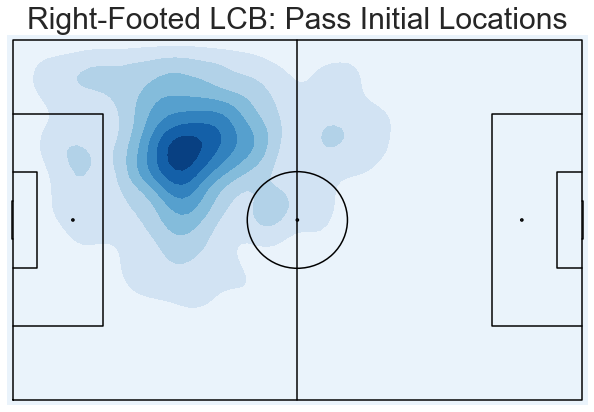

In [30]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Locations', 'Blues')

In [31]:
x,y = get_xy(four_defs_lcb_rf_clusters, 'L_CB_inaccpassloc', len(four_defs_lcb_rf_clusters), 1)

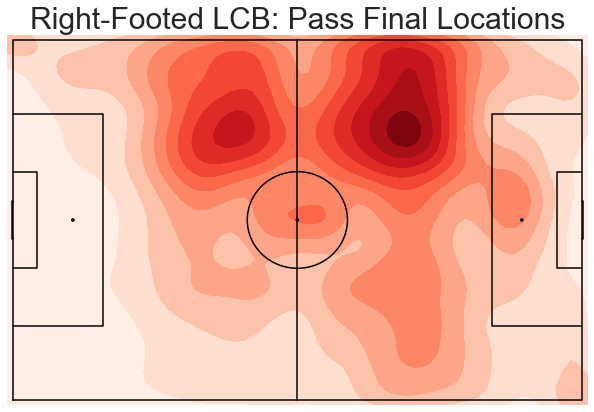

In [32]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Locations', 'Reds')

##  Four Defender Formation  - Left Footed LCB

### Accurate Passes

In [33]:
a,b = get_xy(four_defs_lcb_lf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_lf_clusters), 0)

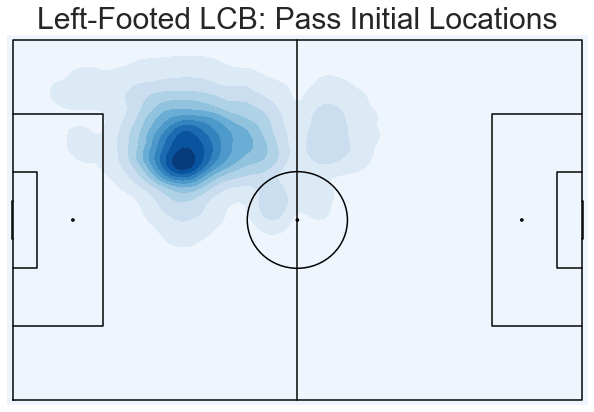

In [34]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Locations', 'Blues')

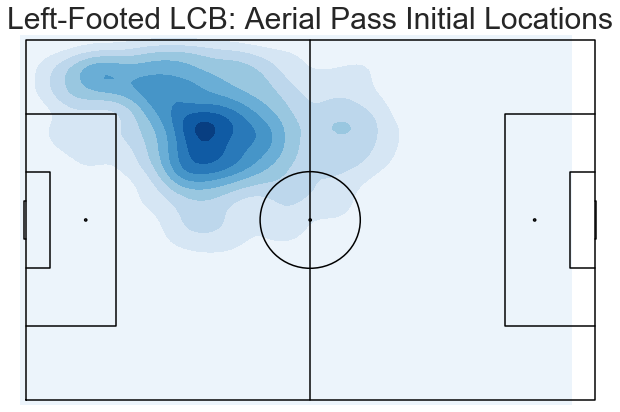

In [35]:
a,b = get_xy(four_defs_lcb_lf_clusters, 'L_CB_acchighpassloc', len(four_defs_lcb_lf_clusters), 0)
heatmap(a, b, 'Left-Footed LCB: Aerial Pass Initial Locations', 'Blues')

In [36]:
x1,y1 = get_xy(four_defs_lcb_lf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_lf_clusters), 1)

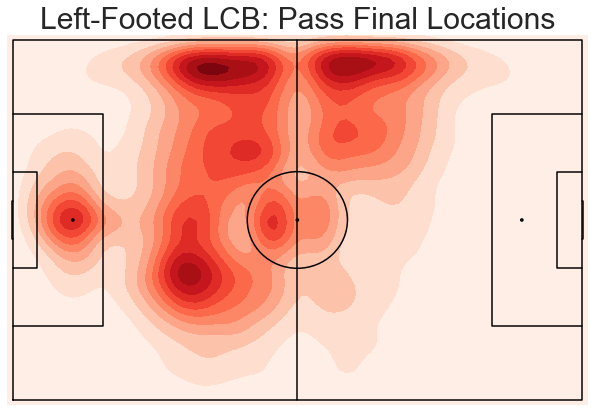

In [37]:
heatmap(x1,y1, 'Left-Footed LCB: Pass Final Locations', 'Reds')

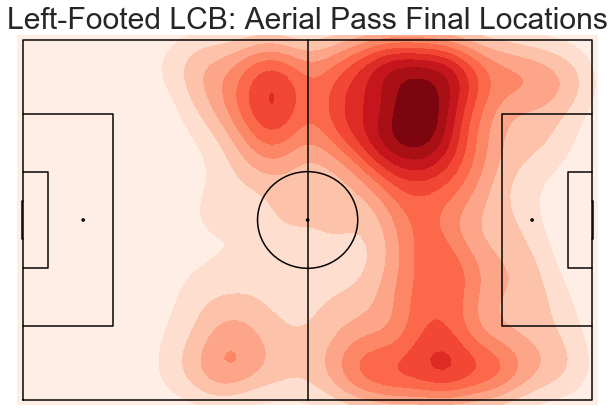

In [38]:
x,y = get_xy(four_defs_lcb_lf_clusters, 'L_CB_acchighpassloc', len(four_defs_lcb_lf_clusters), 1)
heatmap(x, y, 'Left-Footed LCB: Aerial Pass Final Locations', 'Reds')

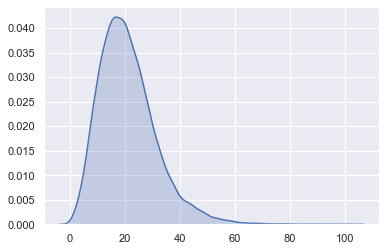

In [39]:
dist1 = compute_dist_pdf(four_defs_lcb_lf_clusters, 'L_CB_accpassloc')

In [40]:
four_defs_lcb_lf_clusters.head()

index     wyId           team  \
0      2  2499721        Burnley   
1      5  2499724       West Ham   
2      6  2499725  Newcastle Utd   
3      7  2499725      Tottenham   
4     12  2499728    Bournemouth   

                                        team_defense  \
0  [MatthewLowton, JamesTarkowski, BenMee, Stephe...   
1  [PabloJavierZabaletaGirod, WinstonReid, Angelo...   
2  [JavierManquilloGaitan, FlorianLejeune, Ciaran...   
3  [KyleWalkerPeters, TobyAlderweireld, JanVerton...   
4  [SimonFrancis, SteveCook, NathanAke, CharlieDa...   

                         RB              R_CB                 L_CB  \
0             MatthewLowton    JamesTarkowski               BenMee   
1  PabloJavierZabaletaGirod       WinstonReid  AngeloObinzeOgbonna   
2     JavierManquilloGaitan    FlorianLejeune          CiaranClark   
3          KyleWalkerPeters  TobyAlderweireld        JanVertonghen   
4              SimonFrancis         SteveCook            NathanAke   

               LB  RCB   CB  LCB  RWB  LWB  backline                    match  \
0     StephenWard  NaN  NaN  NaN  NaN  NaN       4.0          Chelsea-Burnley   
1   ArthurMasuaku  NaN  NaN  NaN  NaN  NaN       4.0  Manchester Utd-West Ham   
2     PaulDummett  NaN  NaN  NaN  NaN  NaN       4.0  Newcastle Utd-Tottenham   
3       BenDavies  NaN  NaN  NaN  NaN  NaN       4.0  Newcastle Utd-Tottenham   
4  CharlieDaniels  NaN  NaN  NaN  NaN  NaN       4.0    West Brom-Bournemouth   

  gameweek                                          teamsData  \
0        1  {'1646': {'scoreET': 0, 'coachId': 8880, 'side...   
1        1  {'1633': {'scoreET': 0, 'coachId': 269869, 'si...   
2        1  {'1613': {'scoreET': 0, 'coachId': 210700, 'si...   
3        1  {'1613': {'scoreET': 0, 'coachId': 210700, 'si...   
4        1  {'1659': {'scoreET': 0, 'coachId': 8934, 'side...   

               dateutc            venue  \
0  2017-08-12 14:00:00  Stamford Bridge   
1  2017-08-13 15:00:00     Old Trafford   
2  2017-08-13 12:30:00  St. James' Park   
3  2017-08-13 12:30:00  St. James' Park   
4  2017-08-12 14:00:00    The Hawthorns   

                                            referees score  \
0  [{'refereeId': 378951, 'role': 'referee'}, {'r...   2–3   
1  [{'refereeId': 384888, 'role': 'referee'}, {'r...   4–0   
2  [{'refereeId': 385911, 'role': 'referee'}, {'r...   0–2   
3  [{'refereeId': 385911, 'role': 'referee'}, {'r...   0–2   
4  [{'refereeId': 379443, 'role': 'referee'}, {'r...   1–0   

              footedness  RB_pass  RB_accpass  RB_highpass  RB_acchighpass  \
0  right-right-left-left       29          27            1               1   
1  right-right-left-left       29          22            4               3   
2  right-right-left-left       21          11            3               0   
3  right-right-left-left       58          52            5               4   
4  right-right-left-left       56          46            5               1   

                                       RB_accpassloc  \
0  [[[22.88, 21.76], [32.24, 21.76]], [[18.72, 16...   
1  [[[24.96, 10.2], [34.32, 4.76]], [[40.56, 5.44...   
2  [[[78.0, 3.4], [80.08, 4.76]], [[38.48, 6.12],...   
3  [[[29.12, 4.76], [50.96, 11.56]], [[38.48, 14....   
4  [[[26.0, 6.12], [21.84, 12.92]], [[42.64, 10.2...   

                                     RB_inaccpassloc  \
0  [[[28.08, 4.76], [30.16, 0.0]], [[87.36, 6.8],...   
1  [[[66.56, 23.12], [101.92, 11.56]], [[63.44, 1...   
2  [[[74.88, 2.72], [85.28, 6.12]], [[55.12, 3.4]...   
3  [[[37.44, 6.8], [95.68, 10.88]], [[83.2, 8.84]...   
4  [[[40.56, 6.8], [76.96, 12.92]], [[15.6, 12.24...   

                                   RB_acchighpassloc  \
0                   [[[18.72, 6.8], [64.48, 14.28]]]   
1  [[[28.08, 6.8], [71.76, 11.56]], [[57.2, 12.24...   
2                                                 []   
3  [[[29.12, 4.76], [50.96, 11.56]], [[63.44, 5.4...   
4                  [[[43.68, 8.16], [79.04, 12.92]]]   

                                 RB_in

### Inaccurate Passes

In [41]:
a,b = get_xy(four_defs_lcb_lf_clusters, 'L_CB_inaccpassloc', len(four_defs_lcb_lf_clusters), 0)

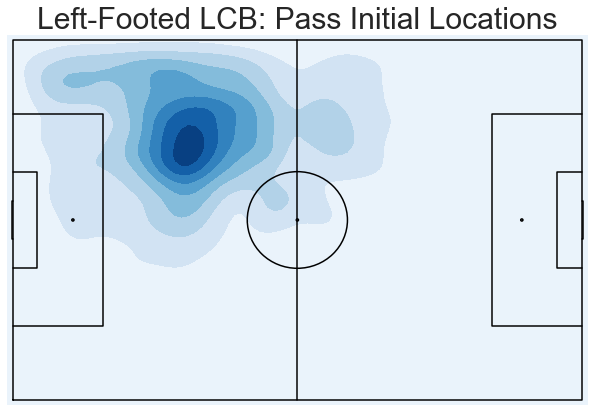

In [42]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Locations', 'Blues')

In [43]:
x1,y1 = get_xy(four_defs_lcb_lf_clusters, 'L_CB_inaccpassloc', len(four_defs_lcb_lf_clusters), 1)

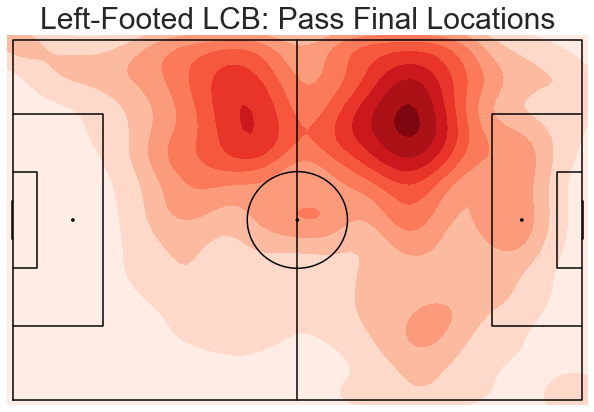

In [44]:
heatmap(x1,y1, 'Left-Footed LCB: Pass Final Locations', 'Reds')

##  3 CB Formations: Left Footed LCB

In [45]:
a,b = get_xy(three_five_defs_lcb_lf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_lf_clusters), 0)
x,y = get_xy(three_five_defs_lcb_lf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_lf_clusters), 1)

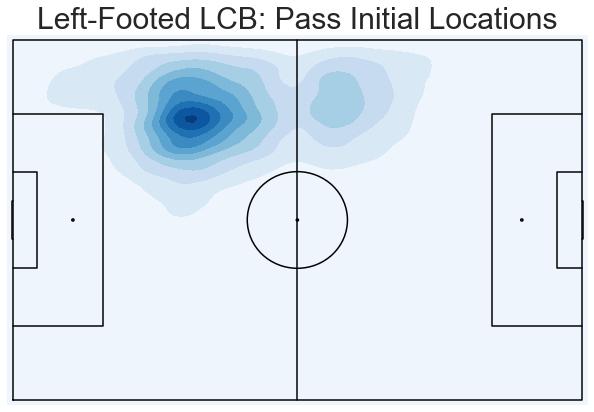

In [46]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Locations', 'Blues')

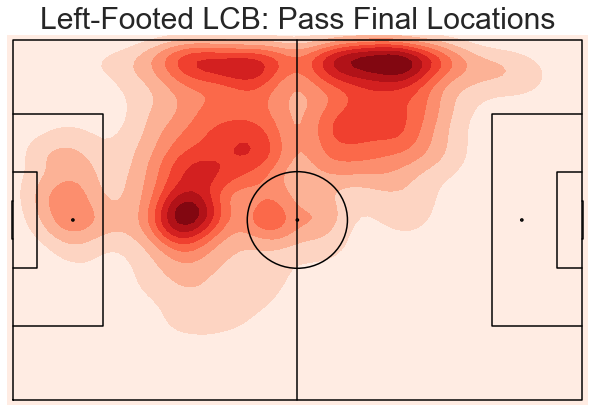

In [47]:
heatmap(x,y, 'Left-Footed LCB: Pass Final Locations', 'Reds')

## 3 CB Formations: Right footed LCB 

In [48]:
a,b = get_xy(three_five_defs_lcb_rf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_rf_clusters), 0)
x,y = get_xy(three_five_defs_lcb_rf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_rf_clusters), 1)

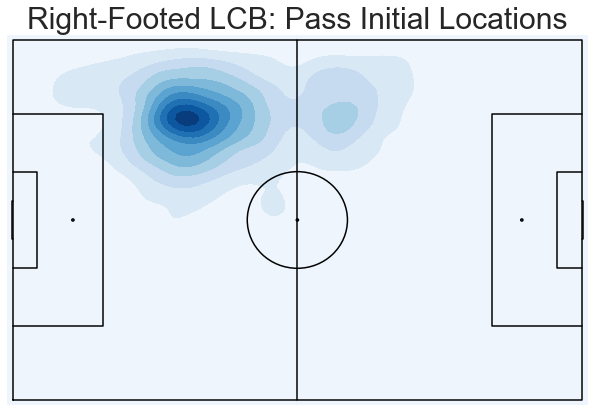

In [49]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Locations', 'Blues')

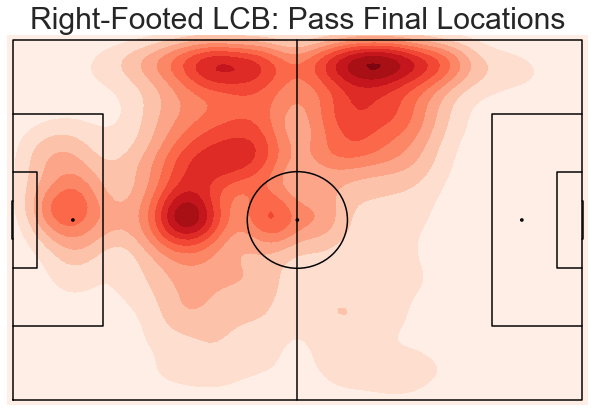

In [50]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Locations', 'Reds')

# Long Distance Pass Analysis 

## Four Defender Formation - Right Footed LCB

In [51]:
r_a, r_b = dist_threshold(four_defs_lcb_rf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_rf_clusters), 0)
r_x, r_y = dist_threshold(four_defs_lcb_rf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_rf_clusters), 1)

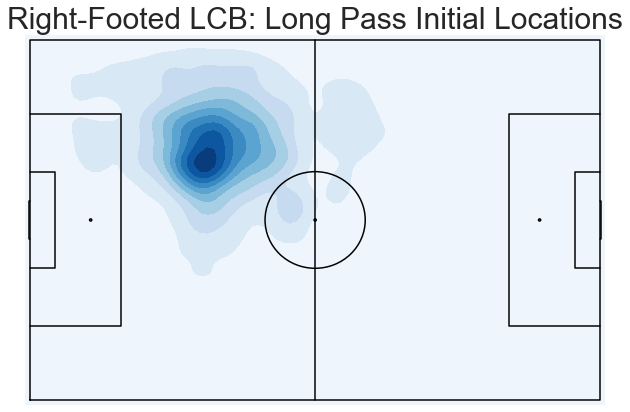

In [52]:
heatmap(r_a, r_b, 'Right-Footed LCB: Long Pass Initial Locations', 'Blues')

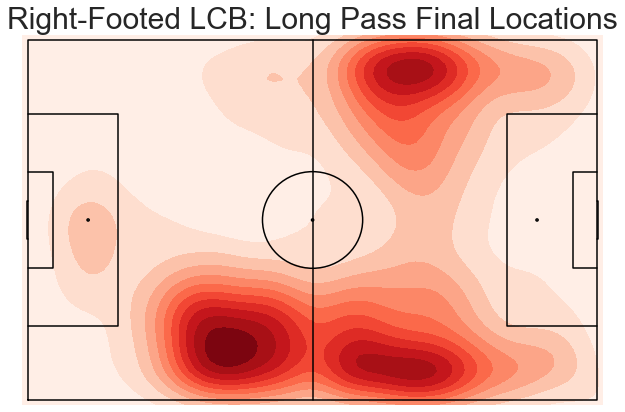

In [53]:
heatmap(r_x, r_y, 'Right-Footed LCB: Long Pass Final Locations', 'Reds')

## Four Defender Formation - Left Footed LCB

In [54]:
l_a, l_b = dist_threshold(four_defs_lcb_lf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_lf_clusters), 0)
l_x, l_y = dist_threshold(four_defs_lcb_lf_clusters, 'L_CB_accpassloc', len(four_defs_lcb_lf_clusters), 1)

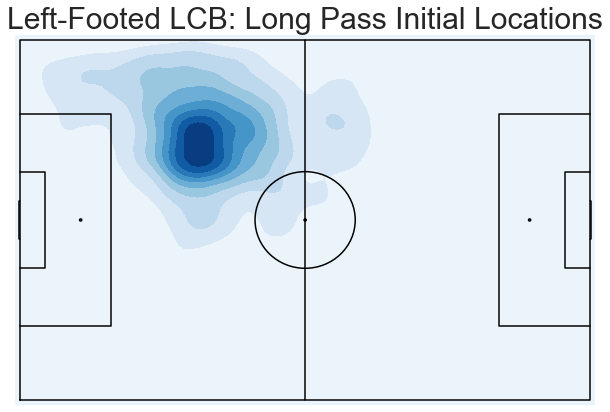

In [55]:
heatmap(l_a, l_b, 'Left-Footed LCB: Long Pass Initial Locations', 'Blues')

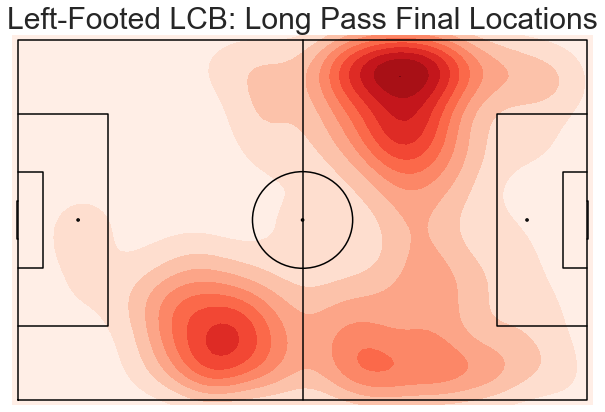

In [56]:
heatmap(l_x, l_y, 'Left-Footed LCB: Long Pass Final Locations', 'Reds')

## 3 CB Formations: Left Footed LCB 

In [57]:
lf_long_i_x,lf_long_i_y = dist_threshold(three_five_defs_lcb_lf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_lf_clusters), 0)
lf_long_f_x,lf_long_f_y = dist_threshold(three_five_defs_lcb_lf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_lf_clusters), 1)

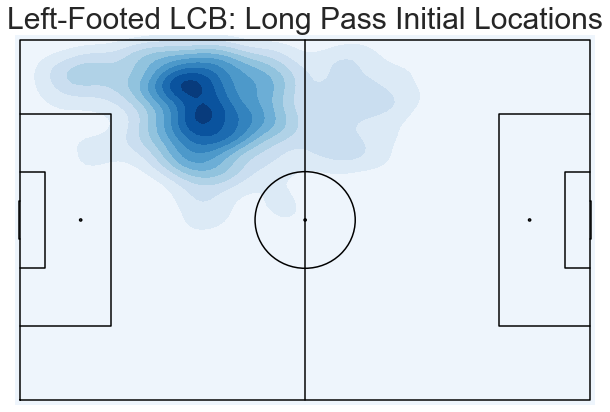

In [58]:
heatmap(lf_long_i_x,lf_long_i_y, 'Left-Footed LCB: Long Pass Initial Locations', 'Blues')

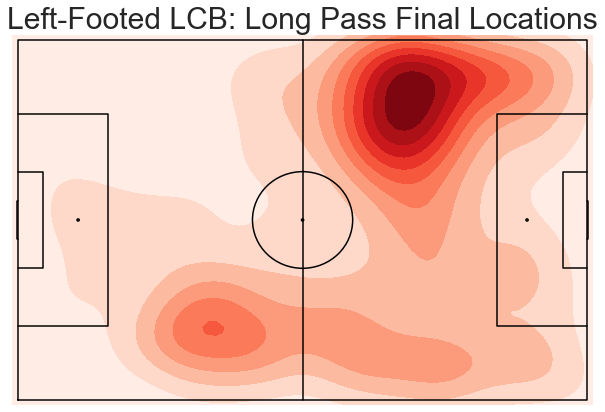

In [59]:
heatmap(lf_long_f_x,lf_long_f_y, 'Left-Footed LCB: Long Pass Final Locations', 'Reds')

##  3 CB Formations: Right Footed LCB

In [60]:
rf_long_i_x,rf_long_i_y = dist_threshold(three_five_defs_lcb_rf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_rf_clusters), 0)
rf_long_f_x,rf_long_f_y = dist_threshold(three_five_defs_lcb_rf_clusters, 'LCB_accpassloc', len(three_five_defs_lcb_rf_clusters), 1)

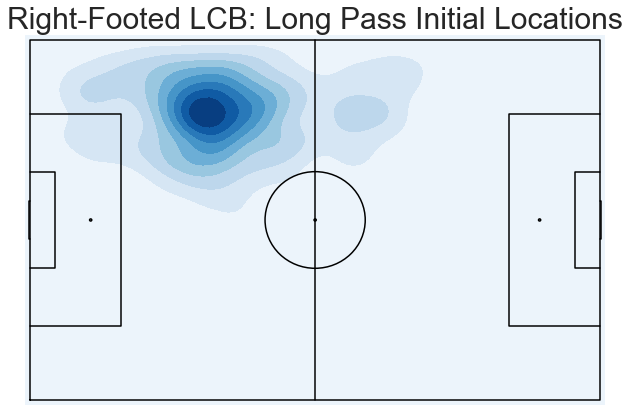

In [61]:
heatmap(rf_long_i_x,rf_long_i_y, 'Right-Footed LCB: Long Pass Initial Locations', 'Blues')

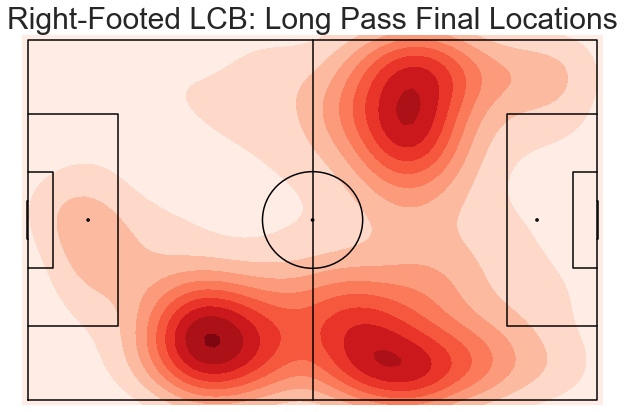

In [62]:
heatmap(rf_long_f_x,rf_long_f_y, 'Right-Footed LCB: Long Pass Final Locations', 'Reds')

# Inferences 

<!-- 1. A Right footed LCB makes the most accurate passes in:<br>
    i. Left Wing Defence Region <br>
    ii. Left Wing Attack Region<br>
    iii. Right Central Defence <br>
2. Out of all these passes, a Right footed LCB makes the most `Long Passes` in:<br>
    i. Right Wing Attack Region <br>
    ii. Right Wing Defence Region <br>
    iii. Left Wing Attack Region <br>
3.  A Left footed LCB makes the most accurate passes in:<br>
    i. Left Wing Attack Region <br>
    ii. Left Wing Defence Region<br>
    iii. Right Central Defence <br>
4. Out of all these passes, a Left footed LCB makes the most `Long Passes` in:<br>
    i. Left Wing Attack Region <br>
    ii. Right + Left Central Attack Region <br>
    iii. Right Wing Attack Region <br>
**Note**: *The `Long Accurate Passes` of a Right footed LCB are observed to be more on either flanks and much lesser central than a Left footed LCB* <br> -->

# Region Percentages 

Order:<br>percentage(x_rightflank_attack), percentage(x_rightflank_def), percentage(
        x_leftflank_attack), percentage(x_leftflank_def), percentage(
            x_rightcentral_attack), percentage(x_rightcentral_def), percentage(
                x_leftcentral_attack), percentage(x_leftcentral_def)

## 4 CB Formations 

In [63]:
# #RRRL
# r = get_region(r_x, r_y)
# print(r)
# reg_rrrl = [(i/len(r_x))*100 for i in r]
# print(reg_rrrl)
# print(len(r_x))
fatb_lcb_rf_region= get_region(r_x, r_y)
print(fatb_lcb_rf_region)
print(len(r_x))
regions = ['rightflank_attack','rightflank_def',
           'leftflank_attack','leftflank_def',
           'rightcentral_attack','rightcentral_def',
           'leftcentral_attack','leftcentral_def']
fatb_lcb_rf_region_per = [i/len(r_x)*100 for i in fatb_lcb_rf_region]
for region, percent in zip(regions,fatb_lcb_rf_region_per):
    print(region,":",percent)

[1572, 1374, 1302, 218, 500, 580, 492, 180]
6218
rightflank_attack : 25.28144097780637
rightflank_def : 22.097137343197172
leftflank_attack : 20.939208748793824
leftflank_def : 3.505950466387906
rightcentral_attack : 8.041170794467673
rightcentral_def : 9.327758121582502
leftcentral_attack : 7.912512061756191
leftcentral_def : 2.8948214860083628


In [64]:
# #RRLL
# r = get_region(l_x, l_y)
# print(r)
# reg_rrll = [(i/len(l_x))*100 for i in r]
# print(reg_rrll)
# print(len(l_x))
fatb_lcb_lf_region = get_region(l_x, l_y)
print(fatb_lcb_lf_region)
print(len(l_x))
regions = ['rightflank_attack','rightflank_def',
           'leftflank_attack','leftflank_def',
           'rightcentral_attack','rightcentral_def',
           'leftcentral_attack','leftcentral_def']
fatb_lcb_lf_region_per = [i/len(l_x)*100 for i in fatb_lcb_lf_region]
for region, percent in zip(regions,fatb_lcb_lf_region_per):
    print(region,":",percent)

[802, 691, 1151, 165, 417, 374, 559, 115]
4274
rightflank_attack : 18.76462330369677
rightflank_def : 16.16752456715021
leftflank_attack : 26.93027608797379
leftflank_def : 3.86055217594759
rightcentral_attack : 9.756668226485727
rightcentral_def : 8.750584932147872
leftcentral_attack : 13.079082826392138
leftcentral_def : 2.6906878802058958


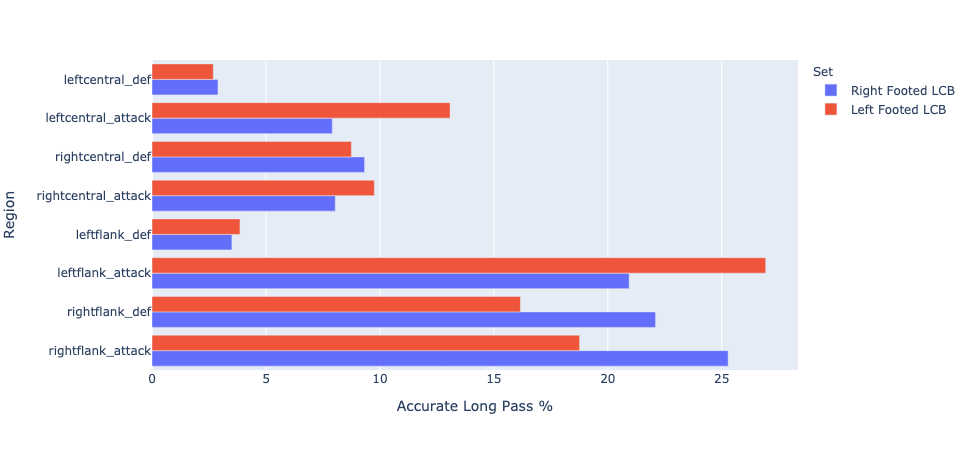

In [65]:
# data_reg = [['Right Flank Attack', 25.517241379310345, 'RRRL'],
#             ['Right Flank Attack',19.224283305227654, 'RRLL'],
#             ['Right Flank Def', 20.086206896551726, 'RRRL'],
#             ['Right Flank Def', 12.478920741989882, 'RRLL'],
#             ['Left Flank Attack', 20.17241379310345, 'RRRL'],
#             ['Left Flank Attack', 28.836424957841484, 'RRLL'],
#             ['Left Flank Def', 3.189655172413793, 'RRRL'],
#             ['Left Flank Def', 3.204047217537943, 'RRLL'],
#             ['Right Central Attack', 7.5, 'RRRL'],
#             ['Right Central Attack', 12.647554806070826, 'RRLL'],
#             ['Right Central Def', 11.637931034482758, 'RRRL'],
#             ['Right Central Def', 8.600337268128163, 'RRLL'],
#             ['Left Central Attack', 8.620689655172415, 'RRRL'],
#             ['Left Central Attack', 10.961214165261383, 'RRLL'],
#             ['Left Central Def', 3.2758620689655173, 'RRRL'],
#             ['Left Central Def', 4.0472175379426645, 'RRLL']]
# reg = pd.DataFrame(data_reg, columns = ['Region', 'Accurate Long Pass %', 'Set'])
# fig = px.bar(reg, x="Accurate Long Pass %", y="Region", color='Set', barmode='group', orientation='h')
# fig.show()
fatb_lcb_rf_data = list(zip(regions,fatb_lcb_rf_region_per))
fatb_lcb_rf_data_reg = [list(i) + ["Right Footed LCB"] for i in fatb_lcb_rf_data]
fatb_lcb_lf_data = list(zip(regions,fatb_lcb_lf_region_per))
fatb_lcb_lf_data_reg = [list(i) + ["Left Footed LCB"] for i in fatb_lcb_lf_data]
data_reg = fatb_lcb_rf_data_reg + fatb_lcb_lf_data_reg
reg = pd.DataFrame(data_reg, columns = ['Region', 'Accurate Long Pass %', 'Set'])
fig = px.bar(reg, x="Accurate Long Pass %", y="Region", color='Set', barmode='group', orientation='h')
fig.show()

## 3 CB Formations 

In [66]:
# r_lf = get_region(lf_long_f_x,lf_long_f_y)
# print(r_lf)
# reg_lcb_lf = [(i/len(lf_long_f_x))*100 for i in r_lf]
# reg_lcb_lf
three_five_lcb_lf_region = get_region(lf_long_f_x, lf_long_f_y)
print(three_five_lcb_lf_region)
print(len(lf_long_f_x))
regions = ['rightflank_attack','rightflank_def',
           'leftflank_attack','leftflank_def',
           'rightcentral_attack','rightcentral_def',
           'leftcentral_attack','leftcentral_def']
three_five_lcb_lf_region_per = [i/len(lf_long_f_x)*100 for i in three_five_lcb_lf_region]
for region, percent in zip(regions,three_five_lcb_lf_region_per):
    print(region,":",percent)

[262, 200, 513, 52, 186, 133, 263, 78]
1687
rightflank_attack : 15.530527563722584
rightflank_def : 11.855364552459987
leftflank_attack : 30.409010077059868
leftflank_def : 3.082394783639597
rightcentral_attack : 11.025489033787789
rightcentral_def : 7.883817427385892
leftcentral_attack : 15.589804386484884
leftcentral_def : 4.623592175459396


In [67]:
# r_rf = get_region(rf_long_f_x,rf_long_f_y)
# print(r_rf)
# reg_lcb_rf = [(i/len(rf_long_f_x))*100 for i in r_rf]
# reg_lcb_rf
three_five_lcb_rf_region = get_region(rf_long_f_x, rf_long_f_y)
print(three_five_lcb_rf_region)
print(len(rf_long_f_x))
regions = ['rightflank_attack','rightflank_def',
           'leftflank_attack','leftflank_def',
           'rightcentral_attack','rightcentral_def',
           'leftcentral_attack','leftcentral_def']
three_five_lcb_rf_region_per = [i/len(rf_long_f_x)*100 for i in three_five_lcb_rf_region]
for region, percent in zip(regions,three_five_lcb_rf_region_per):
    print(region,":",percent)

[309, 267, 267, 50, 120, 118, 139, 50]
1320
rightflank_attack : 23.40909090909091
rightflank_def : 20.227272727272727
leftflank_attack : 20.227272727272727
leftflank_def : 3.787878787878788
rightcentral_attack : 9.090909090909092
rightcentral_def : 8.93939393939394
leftcentral_attack : 10.53030303030303
leftcentral_def : 3.787878787878788


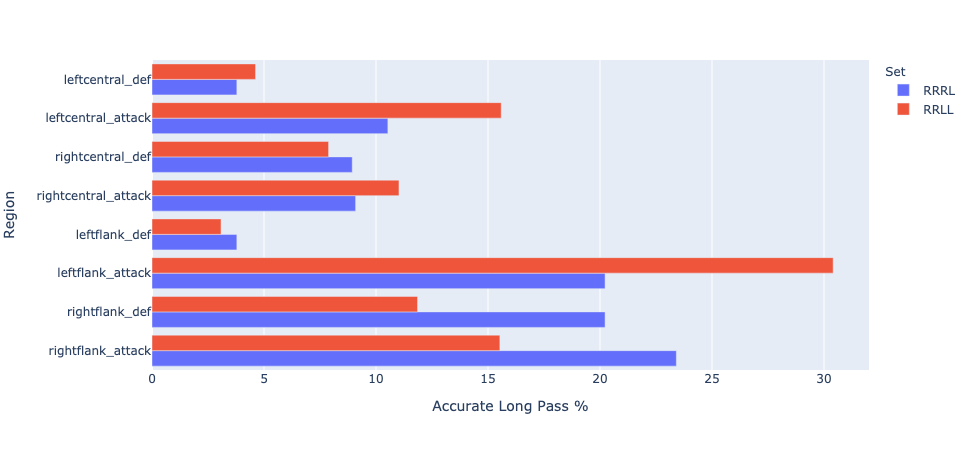

In [68]:
# data_reg = [['Right Flank Attack', 29.100529100529098, 'Right-footed-LCB'],
#             ['Right Flank Attack',18.620689655172416, 'Left-footed-LCB'],
#             ['Right Flank Def', 20.37037037037037, 'Right-footed-LCB'],
#             ['Right Flank Def', 7.241379310344828, 'Left-footed-LCB'],
#             ['Left Flank Attack',16.402116402116402 , 'Right-footed-LCB'],
#             ['Left Flank Attack', 34.82758620689655, 'Left-footed-LCB'],
#             ['Left Flank Def', 3.439153439153439, 'Right-footed-LCB'],
#             ['Left Flank Def', 2.7586206896551726, 'Left-footed-LCB'],
#             ['Right Central Attack', 8.465608465608465, 'Right-footed-LCB'],
#             ['Right Central Attack', 8.96551724137931, 'Left-footed-LCB'],
#             ['Right Central Def',10.052910052910052 , 'Right-footed-LCB'],
#             ['Right Central Def',9.310344827586208, 'Left-footed-LCB'],
#             ['Left Central Attack',9.523809523809524, 'Right-footed-LCB'],
#             ['Left Central Attack', 13.793103448275861, 'Left-footed-LCB'],
#             ['Left Central Def',2.6455026455026456, 'Right-footed-LCB'],
#             ['Left Central Def', 4.482758620689655, 'Left-footed-LCB']]
# reg = pd.DataFrame(data_reg, columns = ['Region', 'Accurate Long Pass %', 'Set'])
# fig = px.bar(reg, x="Accurate Long Pass %", y="Region", color='Set', barmode='group', orientation='h')
# fig.show()
three_five_lcb_rf_data = list(zip(regions,three_five_lcb_rf_region_per))
three_five_lcb_rf_data_reg = [list(i) + ["RRRL"] for i in three_five_lcb_rf_data]
three_five_lcb_lf_data = list(zip(regions,three_five_lcb_lf_region_per))
three_five_lcb_lf_data_reg = [list(i) + ["RRLL"] for i in three_five_lcb_lf_data]
data_reg = three_five_lcb_rf_data_reg + three_five_lcb_lf_data_reg
reg = pd.DataFrame(data_reg, columns = ['Region', 'Accurate Long Pass %', 'Set'])
fig = px.bar(reg, x="Accurate Long Pass %", y="Region", color='Set', barmode='group', orientation='h')
fig.show()

# Test for Statistical Significance (for significance level - 0.05) for four defender formation

## Right - Flank

**Null Hypothesis:** The proportion of passes made at the right flank by left footed LCB (left center back) should be greater than or equal to right footed LCB (left center back) in a lineup with four defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made at the right flank by left footed LCB (left center back) should be less than right footed LCB (left center back) in a lineup with four defenders

**H0: P2 >= P1** <br>
**H1: P2 < P1** <br>
*P1 - right-footed left centre back, P2 - left-footed left centre back*

**The hypothesis stated signifies that we are performing a right tailed test**

## Test for proportions in Right Flank region

In [69]:
# from statsmodels.stats.proportion import proportions_ztest
# count = np.array([529, 188])
# nobs = np.array([1160, 593])
# stat, pval = proportions_ztest(count, nobs, alternative ='larger')
# print(stat, pval)
from statsmodels.stats.proportion import proportions_ztest
count = np.array([fatb_lcb_rf_region[0]+fatb_lcb_rf_region[1],fatb_lcb_lf_region[0]+fatb_lcb_lf_region[1]])
nobs = np.array([len(r_x), len(l_x)])
stat, pval = proportions_ztest(count, nobs, alternative ='larger')
print(stat, pval)

12.679106970841625 3.860323659727005e-37


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

## Left - Flank

**Null Hypothesis:** The proportion of passes made at the left flank by right footed LCB (left center back) should be greater than or equal to left footed LCB (left center back) in a lineup with four defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made at the left flank by right footed LCB (left center back) should be lesser than left footed LCB (left center back) in a lineup with four defenders

**H0: P1 >= P2** <br>
**H1: P1 < P2** <br>
*P1 - right-footed left centre back, P2 - left-footed left centre back*

**The hypothesis stated signifies that we are performing a left tailed test**

## Test for proportions in Left Flank region

In [70]:
count = np.array([fatb_lcb_rf_region[2]+fatb_lcb_rf_region[3], fatb_lcb_lf_region[2]+fatb_lcb_lf_region[3]])
nobs = np.array([len(r_x), len(l_x)])
stat, pval = proportions_ztest(count, nobs,alternative='smaller')
print(stat, pval)

-7.191096244144338 3.213657665737131e-13


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

## Central - Region

**Null Hypothesis:** The proportion of passes made in the central region by right footed LCB (left center back) should be equal to that of left footed LCB (left center back) in a lineup with four defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made in the central region by right footed LCB (left center back) should not be equal to that of left footed LCB (left center back) in a lineup with four defenders

**H0: P1 = P2** <br>
**H1: P1 != P2** <br>
*P1 - right-footed left centre back, P2 - left-footed left centre back*

## Test for proportions in Central region

In [71]:
count = np.array([
    fatb_lcb_rf_region[4] + fatb_lcb_rf_region[5] + fatb_lcb_rf_region[6] + fatb_lcb_rf_region[7],
    fatb_lcb_lf_region[4] + fatb_lcb_lf_region[5] + fatb_lcb_lf_region[6] + fatb_lcb_lf_region[7]
])
nobs = np.array([len(r_x), len(l_x)])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-6.659072905000011 2.7556022977706902e-11


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

# Test for Statistical Significance (for significance level - 0.05) for three/five defender formation

## Right - Flank

**Null Hypothesis:** The proportion of passes made at the right flank by left footed LCB (left center back) should be greater than or equal to right footed LCB (left center back) in a lineup with three/five defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made at the right flank by left footed LCB (left center back) should be less than right footed LCB (left center back) in a lineup with three/five defenders

**H0: P2 >= P1** <br>
**H1: P2 < P1** <br>
*P1 - right-footed left centre back, P2 - left-footed left centre back*

**The hypothesis stated signifies that we are performing a right tailed test**

## Test for proportions in Right Flank region

In [72]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([three_five_lcb_rf_region[0]+three_five_lcb_rf_region[1],three_five_lcb_lf_region[0]+three_five_lcb_lf_region[1]])
nobs = np.array([len(rf_long_f_x), len(lf_long_f_x)])
stat, pval = proportions_ztest(count, nobs, alternative ='larger')
print(stat, pval)

9.30155702666935 6.920190174734947e-21


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

## Left - Flank

**Null Hypothesis:** The proportion of passes made at the left flank by right footed LCB (left center back) should be greater than or equal to left footed LCB (left center back) in a lineup with three/five defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made at the left flank by right footed LCB (left center back) should be lesser than left footed LCB (left center back) in a lineup with three/five defenders

**H0: P1 >= P2** <br>
**H1: P1 < P2** <br>
*P1 - right-footed left centre back, P2 - left-footed left centre back*

**The hypothesis stated signifies that we are performing a left tailed test**

## Test for proportions in Left Flank region

In [73]:
count = np.array([three_five_lcb_rf_region[2]+three_five_lcb_rf_region[3], three_five_lcb_lf_region[2]+three_five_lcb_lf_region[3]])
nobs = np.array([len(rf_long_f_x), len(lf_long_f_x)])
stat, pval = proportions_ztest(count, nobs,alternative='smaller')
print(stat, pval)

-5.664141890240012 7.388105109461136e-09


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

## Central - Region

**Null Hypothesis:** The proportion of passes made in the central region by right footed LCB (left center back) should be equal to that of left footed LCB (left center back) in a lineup with three/five defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made in the central region by right footed LCB (left center back) should not be equal to that of left footed LCB (left center back) in a lineup with three/five defenders

**H0: P1 = P2** <br>
**H1: P1 != P2** <br>
*P1 - right-footed left centre back, P2 - left-footed left centre back*

## Test for proportions in Central Region

In [74]:
count = np.array([three_five_lcb_rf_region[4]+three_five_lcb_rf_region[5]+three_five_lcb_rf_region[6]+three_five_lcb_rf_region[7], 
                  three_five_lcb_lf_region[4]+three_five_lcb_lf_region[5]+three_five_lcb_lf_region[6]+three_five_lcb_lf_region[7]])
nobs = np.array([len(rf_long_f_x), len(lf_long_f_x)])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-3.837116756935133 0.00012448729410962896


Since the p-value is greater than 0.05, we do not have a statistically significant difference at 0.05 significance.

# Random Sampling Test
The dataset is sampled at 20% of the total number of entries (i.e. 64 samples for RRRL dataset and 32 samples for RRLL dataset) and the process of computing the accurate long pass percentage across different regions is implemented. These steps are repeated for 50 times and the number of instances where percentage of accurate long passes at right wing and right back region by right footed LCB defender surpasses that of a left footed defender at the same position are noted.

In [75]:
def sample_test(df1, df2, col, n, m):
    # df1 - Right footed LCB
    # df1 - Left footed LCB
    # n - sampling fraction
    # m - no of testing iterations
    c=0
    for i in tqdm(range(m)):
        sample_df1 = df1.sample(frac = n)
        sample_df2 = df2.sample(frac = n)
        sample_df1 = sample_df1.reset_index()
        sample_df2 = sample_df2.reset_index()
        x, y = dist_threshold(sample_df1, col, len(sample_df1), 1)
        x1, y1 = dist_threshold(sample_df2, col, len(sample_df2), 1)
        r = get_region(x, y)
        r1 = get_region(x1, y1)
        if(((r[0]+r[1])/len(x)) > ((r1[0]+r1[0])/len(x1))):
            c=c+1
    print((c/m)*100)

In [76]:
sample_test(four_defs_lcb_rf_clusters, four_defs_lcb_lf_clusters, 'L_CB_accpassloc', 0.2, 50)

100%|██████████| 50/50 [00:39<00:00,  1.25it/s]

100.0
